# Computing Distance
## In Progress

Let's assume you need to know how far away you away from a target. The good news is it's about as simple as computing the angle. The bad news is it does require a bit more info. You need to know the height and angle your camera is mounted at. Why? Because it's pretty simple trig though so at least there's that. 

So, to compute distance you need
- target centroid
- FoV of the camera
- Target Height
- Height and Angle the camera is mounted at

(-1.546875, -1.5700978502809577)

<function __main__.thresh>

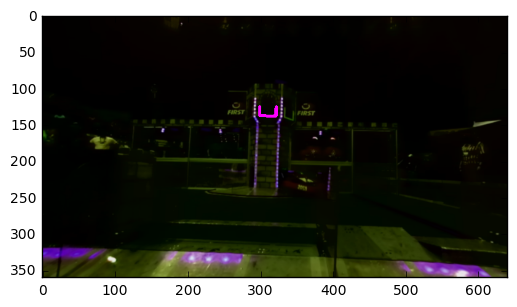

In [13]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np


images = glob.glob('images/stereo_labs/*.png')

FOV = 110.0
RATIO = 16.0/9.0


def rateContours(r):
    return cv2.contourArea(r)

# Extracts the centroid from a contour, seriously, why isn't this built in?
def centroid(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return (cx, cy)

# Map pixels to degrees
def getAngle(centroid, FOV, WIDTH):
    slope = float(FOV)/WIDTH
    intercept = -FOV/2.0
    angle = (centroid[0]*slope)+intercept
    return angle

def getDistance(centroid, FOV, RATIO, HEIGHT, offsetAngle=0, offsetHeight=0):
    adjustedFOV = FOV * RATIO
    slope = float(adjustedFOV)/HEIGHT
    intercept = -adjustedFOV/2.0
    angle = (centroid[1]*slope) + intercept + offsetAngle
    return math.atan(math.degrees(angle))


def thresh(imagePath ,h_min=60, h_max=90):
    image = cv2.imread(imagePath)
    hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    COLOR_MIN = np.array([h_min, 150, 150], np.uint8)
    COLOR_MAX = np.array([h_max, 255, 255], np.uint8)
    thresh = cv2.inRange(hsv_img, COLOR_MIN, COLOR_MAX)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    allContours = image.copy()
    contours = sorted(contours, key=rateContours, reverse=True)
    oneContour = image.copy()
    cv2.drawContours(oneContour,contours,0,(255,0,255),2)
    plt.imshow(oneContour)
    c = centroid(contours[0])
    return (getAngle(c, FOV, 640), getDistance(c, FOV, RATIO, 360))
    
interact(thresh, h_min=(0,180, 5), h_max=(0,180, 5), imagePath=images)